# Project Brief


In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the loan dataset

LoanData = pd.read_csv('C:/Users/DELL/Downloads/loan/loan.csv')


In [3]:

#Data Cleaning 
#Deleting duplicate rows if any:
print('Shape of the loan dataframe before the deletion operation',LoanData.shape)

LoanData_RemoveDuplicates = LoanData.drop_duplicates()
print('Shape of loan data frame after the deletion operation',LoanData_RemoveDuplicates.shape)

Shape of the loan dataframe before the deletion operation (39717, 111)
Shape of loan data frame after the deletion operation (39717, 111)


In [4]:
#No duplicates rows can be found so we can proceed with further cleaning process.

#checking how many rows and columns have missing values:
#Check for rows
print('Number of empty Rows:',LoanData.isnull().all(axis=1).sum())
#observation:- There are no empty rows

# Check for columns
print('Number of empty Columns:',LoanData.isnull().all(axis=0).sum())
#observation: - There are 54 empty columns

Number of empty Rows: 0
Number of empty Columns: 54


In [5]:
# Removing empty rows:
#Filtering the columns which are empty


# Find the columns where each value is null
empty_cols = [col for col in LoanData.columns if LoanData[col].isnull().all()]
# Drop these columns from the dataframe
LoanData.drop(empty_cols,axis=1,inplace=True)


#checking the shape after dropping columns where all the values are empty
LoanData.shape
#observation: 54 empty columns are dropped.

(39717, 57)

In [6]:
#checking duplicates in id column

duplicate_values = LoanData[LoanData.duplicated(['id'])]
duplicate_values

#observtions: No duplicate values found in the id column

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [7]:
#finding out the columns which only have 1 same value across as they would be of little to no use for any analysis.

column_unique = LoanData.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [8]:
#filtering column with only one unique value:


cu = column_unique[column_unique.values == 1]
cu.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [9]:
LoanData.drop(columns = list(cu.index),inplace = True)
#Dropped the columns

#Checking the shape to verify the difference:
LoanData.shape

(39717, 48)

In [10]:
#Dropping all the columns having any missing values as records or do not serve a purpose in analysis as they don't have any related information:

LoanData.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], axis=1,inplace=True)

LoanData.shape

(39717, 41)

In [11]:
#Deleting emp_title column as most of the string values are unique and hence don't serve a purpose in our analysis

LoanData.drop(['emp_title'], axis=1,inplace=True)

LoanData.shape

(39717, 40)

# Identifying Categorical Data/Columns which would mostly be used for Data Analysis:

In [12]:
# We can identify this data by finding out the number of unique values in the entire columns:
LoanData.nunique().sort_values(ascending = False)

total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state                    50
open_acc                      40
sub_grade                     35
purpose                       14
delinq_2yr

In [13]:
#Our main goal for this analysis is to figure out the possibility of a borrower defaulting 
#So we can remove the entries for loan_status == current as we cannot derive anything from it as we cannot assume if it would be paid or not:

#status values before we remove entries with status as current
print(LoanData.loan_status.unique())


LoanData = LoanData[LoanData.loan_status != "Current"]

#after removing current borrowers the below 2 columns only have 1 unique value remaining hence we can discard them
LoanData.drop(['out_prncp','out_prncp_inv'], axis=1,inplace=True)

#status values after we remove entries with status as current:
LoanData.loan_status.unique()

['Fully Paid' 'Charged Off' 'Current']


array(['Fully Paid', 'Charged Off'], dtype=object)

In [14]:
LoanData.nunique().sort_values()
LoanData.shape

(38577, 38)

In [15]:
#Data Cleaning - Standardizing Data by removing special characters from rows

#1 -  % symbols from int_rate and revol_util columns

LoanData['int_rate']= LoanData['int_rate'].str.rstrip('%').astype(float)

LoanData['revol_util'] = LoanData['revol_util'].str.rstrip('%').astype(float)



In [16]:
#2 - Removing 'months' from the term column

LoanData['term'] = LoanData['term'].str.rstrip('months')

In [17]:
type(LoanData['emp_length'])

pandas.core.series.Series

In [18]:
#3 - handling missing values for column emp_length

print("Mode : " + LoanData['emp_length'].mode()[0])
LoanData['emp_length'].value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

# The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.
This means that we can safely assign the value of mode to the null values in the column.
Also the missing values are in very low percentage. so imputing the na values with mode value doesn't hamper the analysis

In [19]:
#Filling Mode values in na entries
LoanData['emp_length'].fillna(LoanData['emp_length'].mode()[0], inplace = True)
LoanData['emp_length'].isna().sum()


0

In [20]:
#3(contd) - Removing 'years' from emp_length and Handling exception of 10+ years experience as well as Handling exception of < 1 years

LoanData['emp_length'] = pd.to_numeric(LoanData['emp_length'].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))



# Creating derived columns


In [21]:
# Deriving new columns of months and years by splitting date format

LoanData['issue_d_month'], LoanData['issue_d_year'] = LoanData['issue_d'].str.split('-').str

LoanData['last_credit_pull_d_month'], LoanData['last_credit_pull_d_year'] = LoanData['last_credit_pull_d'].str.split('-').str

LoanData['last_pymnt_d_month'], LoanData['last_pymnt_d_year'] = LoanData['last_pymnt_d'].str.split('-').str

LoanData['earliest_cr_line_month'], LoanData['earliest_cr_line_year'] = LoanData['earliest_cr_line'].str.split('-').str

In [22]:
LoanData['issue_d_year'] = '20' + LoanData['issue_d_year']


# Updating column datatype


In [23]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate', 'emp_length',
          'revol_util']
LoanData[columns] = LoanData[columns].astype(np.float)

In [24]:
# Creating a profit and loss column
LoanData['PnL']=(LoanData['total_pymnt']-LoanData['funded_amnt'])*100/LoanData['funded_amnt']

In [25]:
LoanData['loan_inc_ratio'] = LoanData.funded_amnt*100/LoanData.annual_inc

In [26]:
columns = ['total_acc', 'term', 'issue_d_year']
LoanData[columns] = LoanData[columns].astype(np.int)


In [27]:
columns1 = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
LoanData[columns1] = LoanData[columns1].apply(lambda x: x.astype('category'))

In [28]:
LoanData['annual_inc_lakhs'] = LoanData['annual_inc'] / 1000


In [29]:
LoanData['annual_inc_lakhs'].describe()


count    38577.000000
mean        68.777974
std         64.218682
min          4.000000
25%         40.000000
50%         58.868000
75%         82.000000
max       6000.000000
Name: annual_inc_lakhs, dtype: float64

In [30]:
LoanData.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,PnL,loan_inc_ratio,annual_inc_lakhs
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10.0,RENT,...,2011,May,16,Jan,15,Jan,85,17.263104,20.833333,24.000
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0.0,RENT,...,2011,Sep,13,Apr,13,Apr,99,-59.651600,8.333333,30.000
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10.0,RENT,...,2011,May,16,Jun,14,Nov,01,25.236118,19.588639,12.252
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10.0,RENT,...,2011,Apr,16,Jan,15,Feb,96,22.318900,20.325203,49.200
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3.0,RENT,...,2011,Jan,16,Jan,15,Nov,04,12.644200,13.888889,36.000


# Verifying the Count of columns to determine if they are categorical, numeric or String

In [31]:
numeric_columns = LoanData.select_dtypes(include = [np.number])

categorical_columns = LoanData.select_dtypes(exclude = [np.number, np.object])

string_columns = LoanData.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1], string_columns.shape[1]))

There are 24 numerical , 12 categorical and 13 string features in the training data


In [32]:
## Final dataset for Exploratory Data Analytics
df = LoanData

In [33]:

df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

# Univariate Analysis



In [34]:
df["loan_status"].value_counts()


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

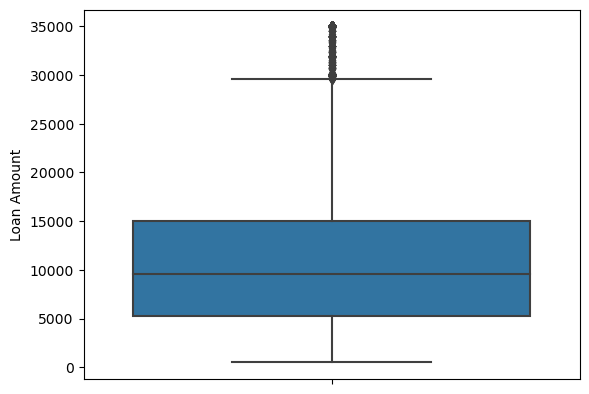

In [35]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

## Observations : The loan amount varies from 0 to 35,000 having median of 10,000



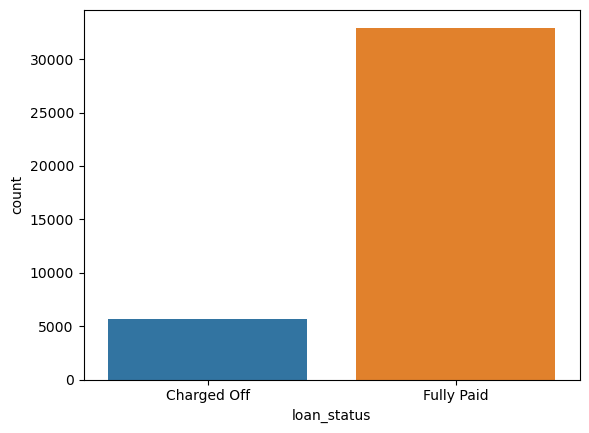

In [36]:
sns.countplot(x= df["loan_status"])
plt.show()

In [37]:
df["loan_status"].value_counts()


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

##### Observations:
    1 . Most of the loans from the loan sample dataset are fully paid
    2. About 14% of loans are charged off/defaulted

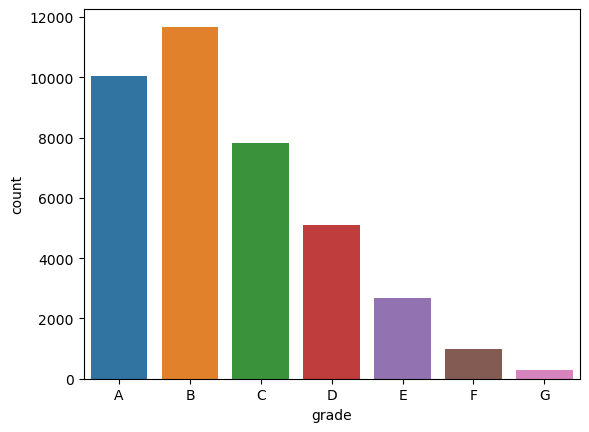

In [38]:
#Plotting the loans on countplot into the buckets using 'grade' column
sns.countplot(x='grade', data=df)
plt.show()

###### Observations:
 Most of the loans belong to grade A and B which means mosst of the loans are highly graded loans

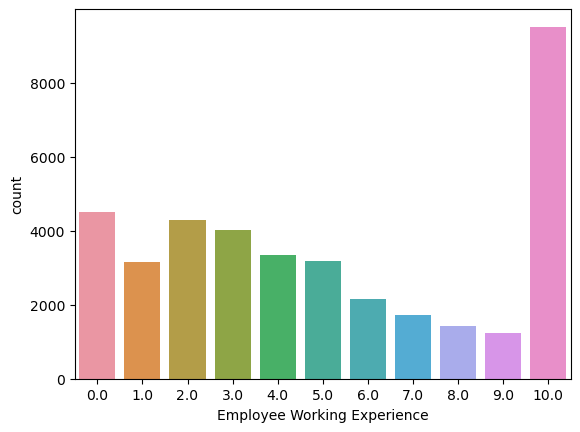

In [39]:
# analyzing  the employment tenure to understand its correlation with Loan applications:

sns.countplot(x='emp_length', data=df)
plt.xlabel('Employee Working Experience')
plt.show()


##### Observation: Majority of the Loan applicants have 10 or 10+ years of experience

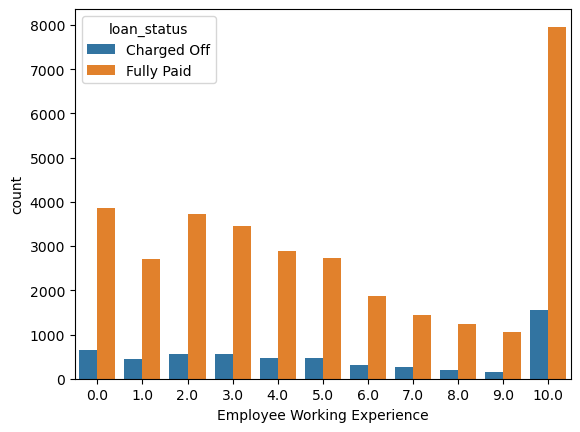

In [40]:
sns.countplot(x='emp_length', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

##### Observation: Majority of the Loan Charged off/defaulted was from the borrowers whose employment tenure was 10/10+ years

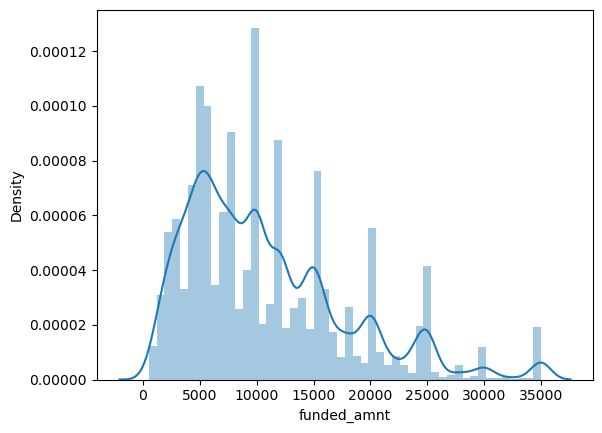

In [41]:
sns.distplot(df['funded_amnt'])
plt.show()

##### Observation: Most of the borrowers have applied for a loan of 5000

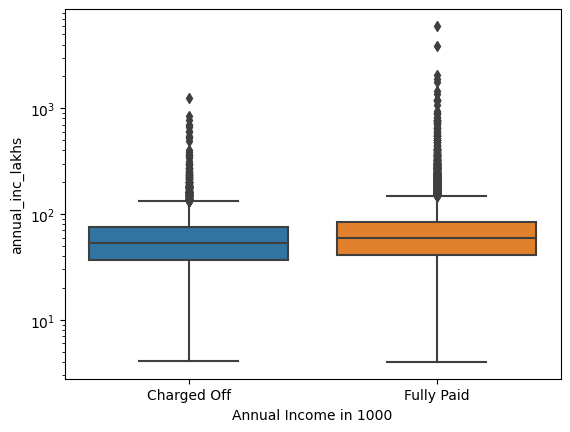

In [42]:
sns.boxplot(x='loan_status', y='annual_inc_lakhs', data=df)
plt.xlabel('Annual Income in 1000')
plt.yscale('log')
plt.show()


##### Observation: The above graph shows slight vairation that Loan Borrowers who have defaulted have lesser income compared to those have fully paid their loans

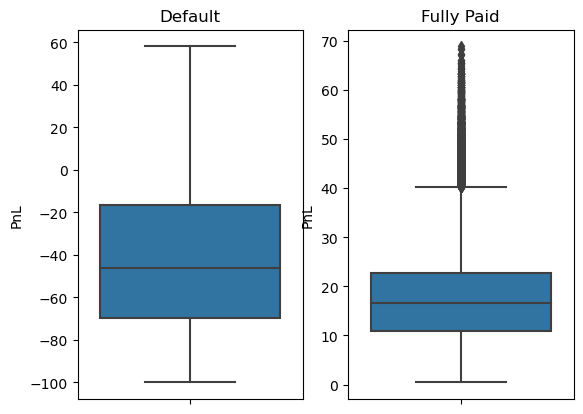

In [43]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

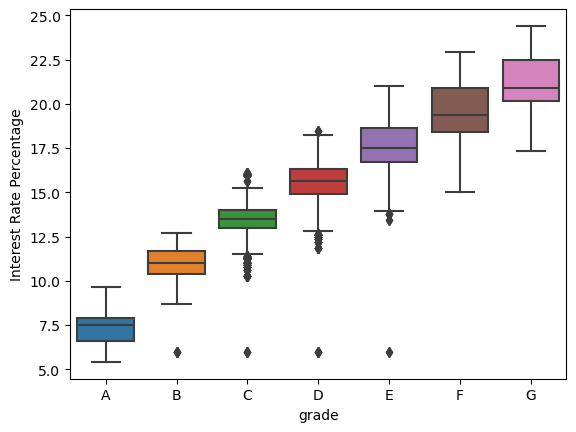

In [44]:
sns.boxplot(y='int_rate', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

##### Observation: The Highly graded loans have less interest rates

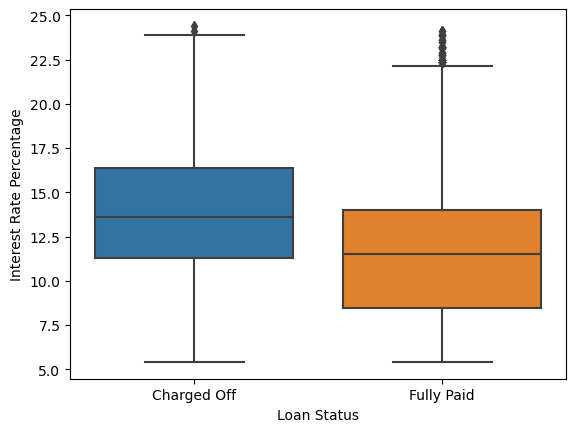

In [45]:
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

##### Observations: Most of the loans which were defaulted had higher interest rates compared to the loans that were returned/fully paid.

# Creating bins for  numerical variable (Interest rate) to make it  categorical

<AxesSubplot:xlabel='emp_length', ylabel='count'>

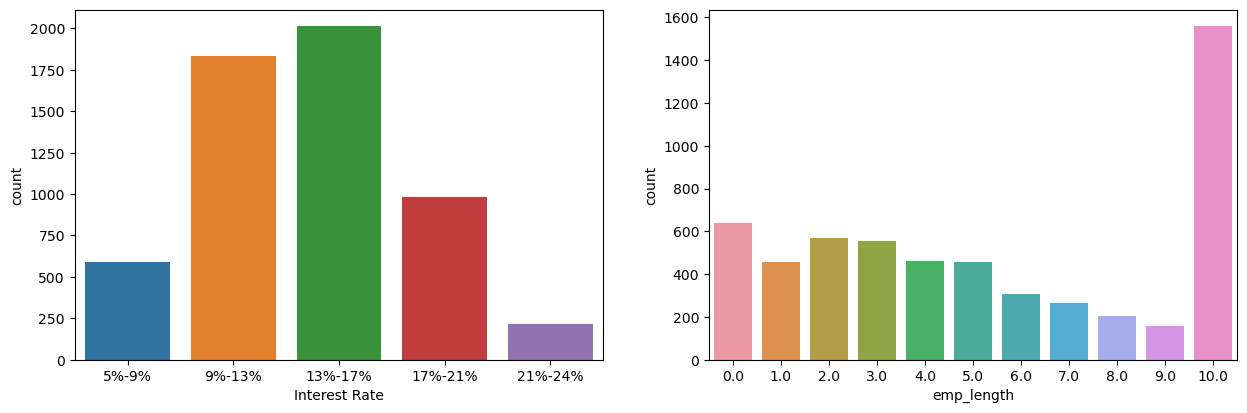

In [46]:

df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

# Analyzing interest rate wrt the interest rate bins created
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=df[df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=df[df.loan_status == 'Charged Off'])

##### Observations: 
1 - Applicants who receive interest at the rate of 13-17%
2 - Applicants who have emp-length of 10/10+years

# Segmented Univariate Analysis

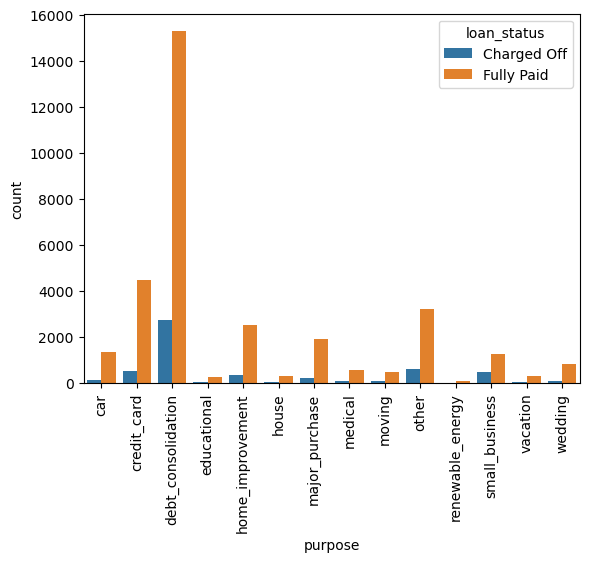

In [47]:
# Analyzing the loan purpose for defaulter to see if we find any patterns

sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

##### Observations: Majority of loan borrowers have borrowed loan for the purpose of debt_consolidation. And we also have most defaulters who had taken loan for debt_consolidation

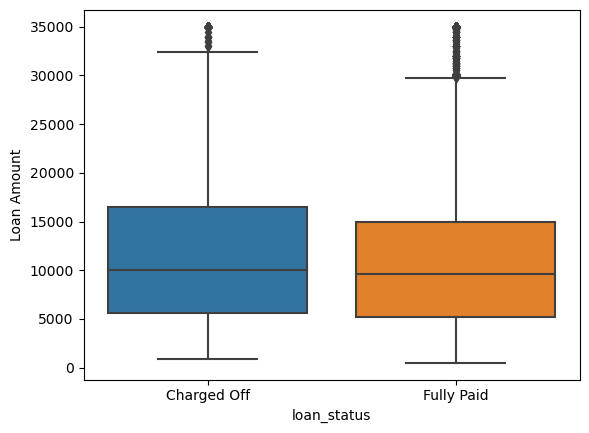

In [48]:
# analyzing loan amount to observe any difference between full paid loans and defaulted loans
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

##### observations: - The Loan Amount's Median , and interquartile range is pretty similar for both Fully Paid and charged off

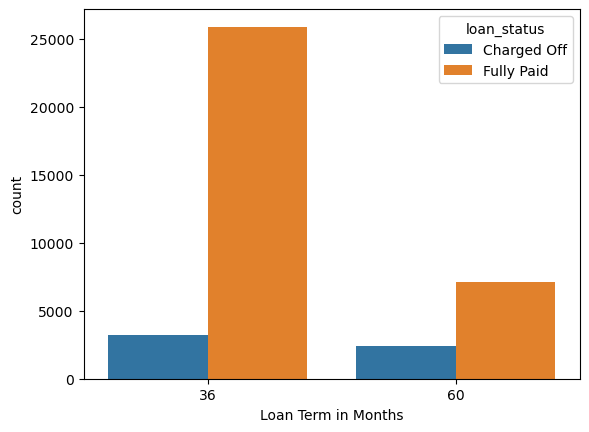

In [49]:
# Analyzing term

sns.countplot( x="term", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

##### Observations: Most of the defaulters are for loan term of 36 Months

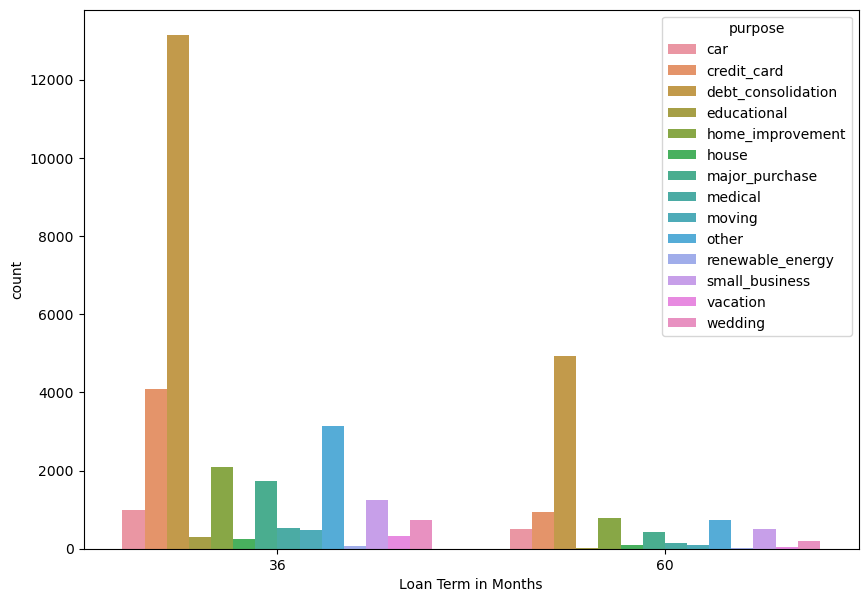

In [50]:
#Analyzing the purpose with the term:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

##### Observation: Our inference of Loan term of 36 Months has a higher chance of being defaulted can be re-verified from this graph as most of the debt_consolidation loans are of term 36 Months

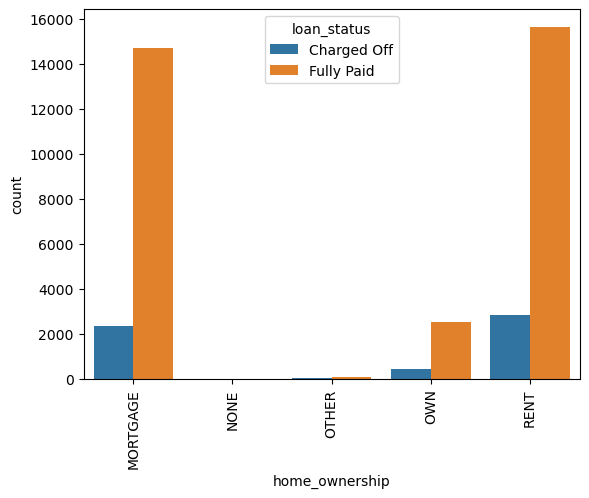

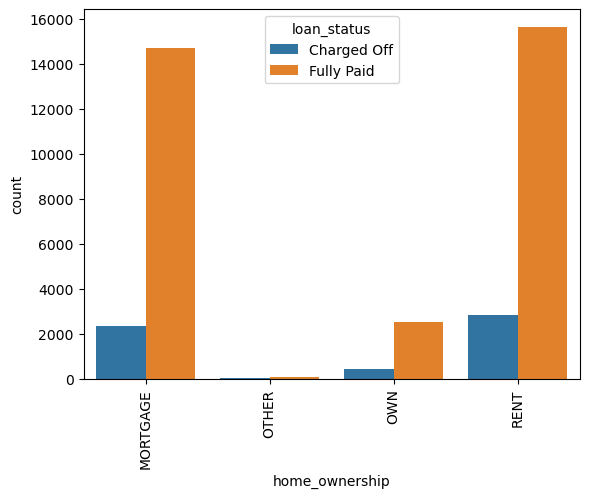

In [51]:
#analyzing home ownership to notice if it has any affect on tendency to default

sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

#There are  few records with 'NONE' value in the data. So replacing the value with 'OTHER'
LoanData['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)


#plotting the above graph again to see the changes
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

##### Observations: The loan borrowers who have house on a mortgage or rent have a higher tendency to default comparing with those who own their house

# Analysing the affects of loan amounts in defaulting

In [52]:
df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()


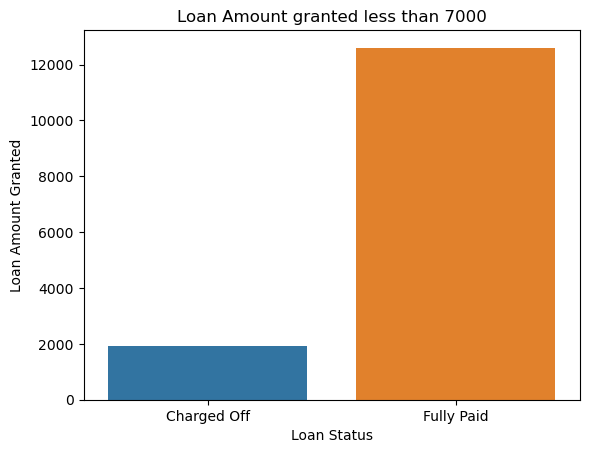

In [53]:

sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7000')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [54]:
df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

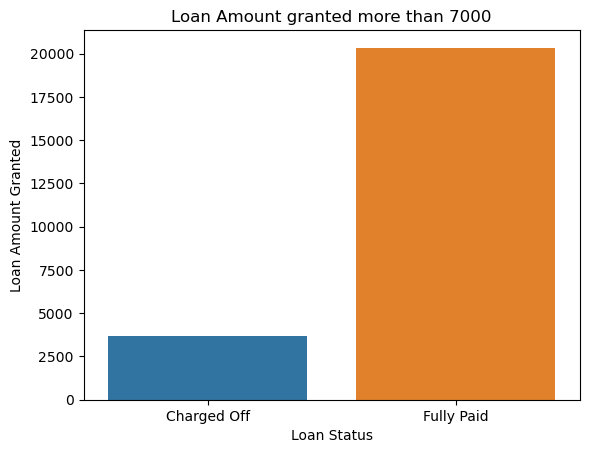

In [55]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7000')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()


#####   Observations: People who have borrowed loan Amount of 7000 or more have a higher tendency to default

# Bivariate Analysis

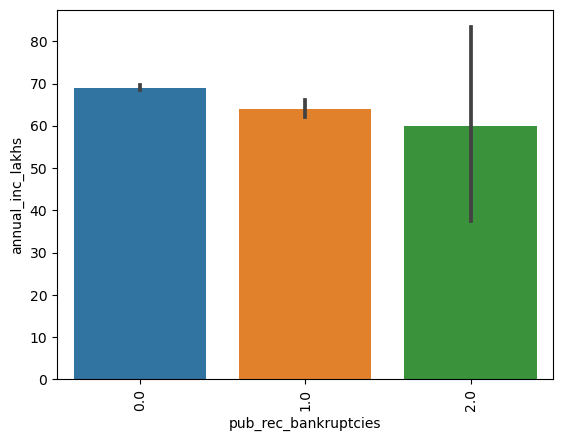

In [56]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

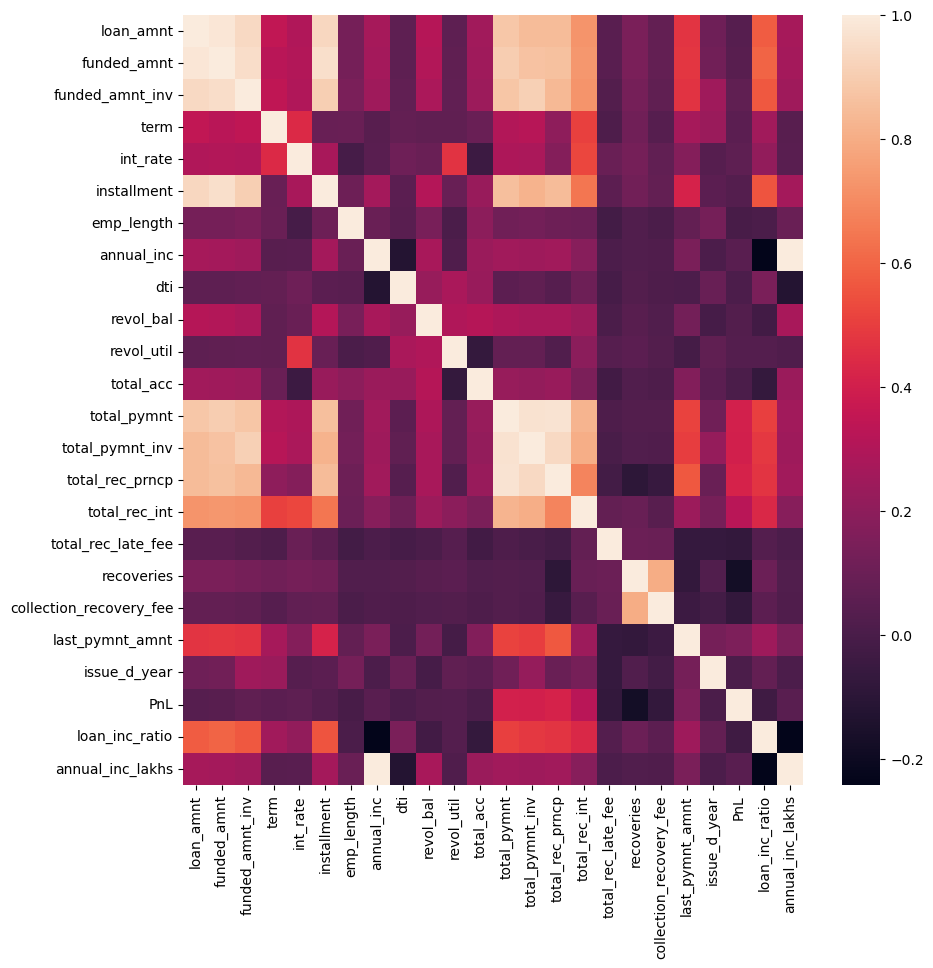

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

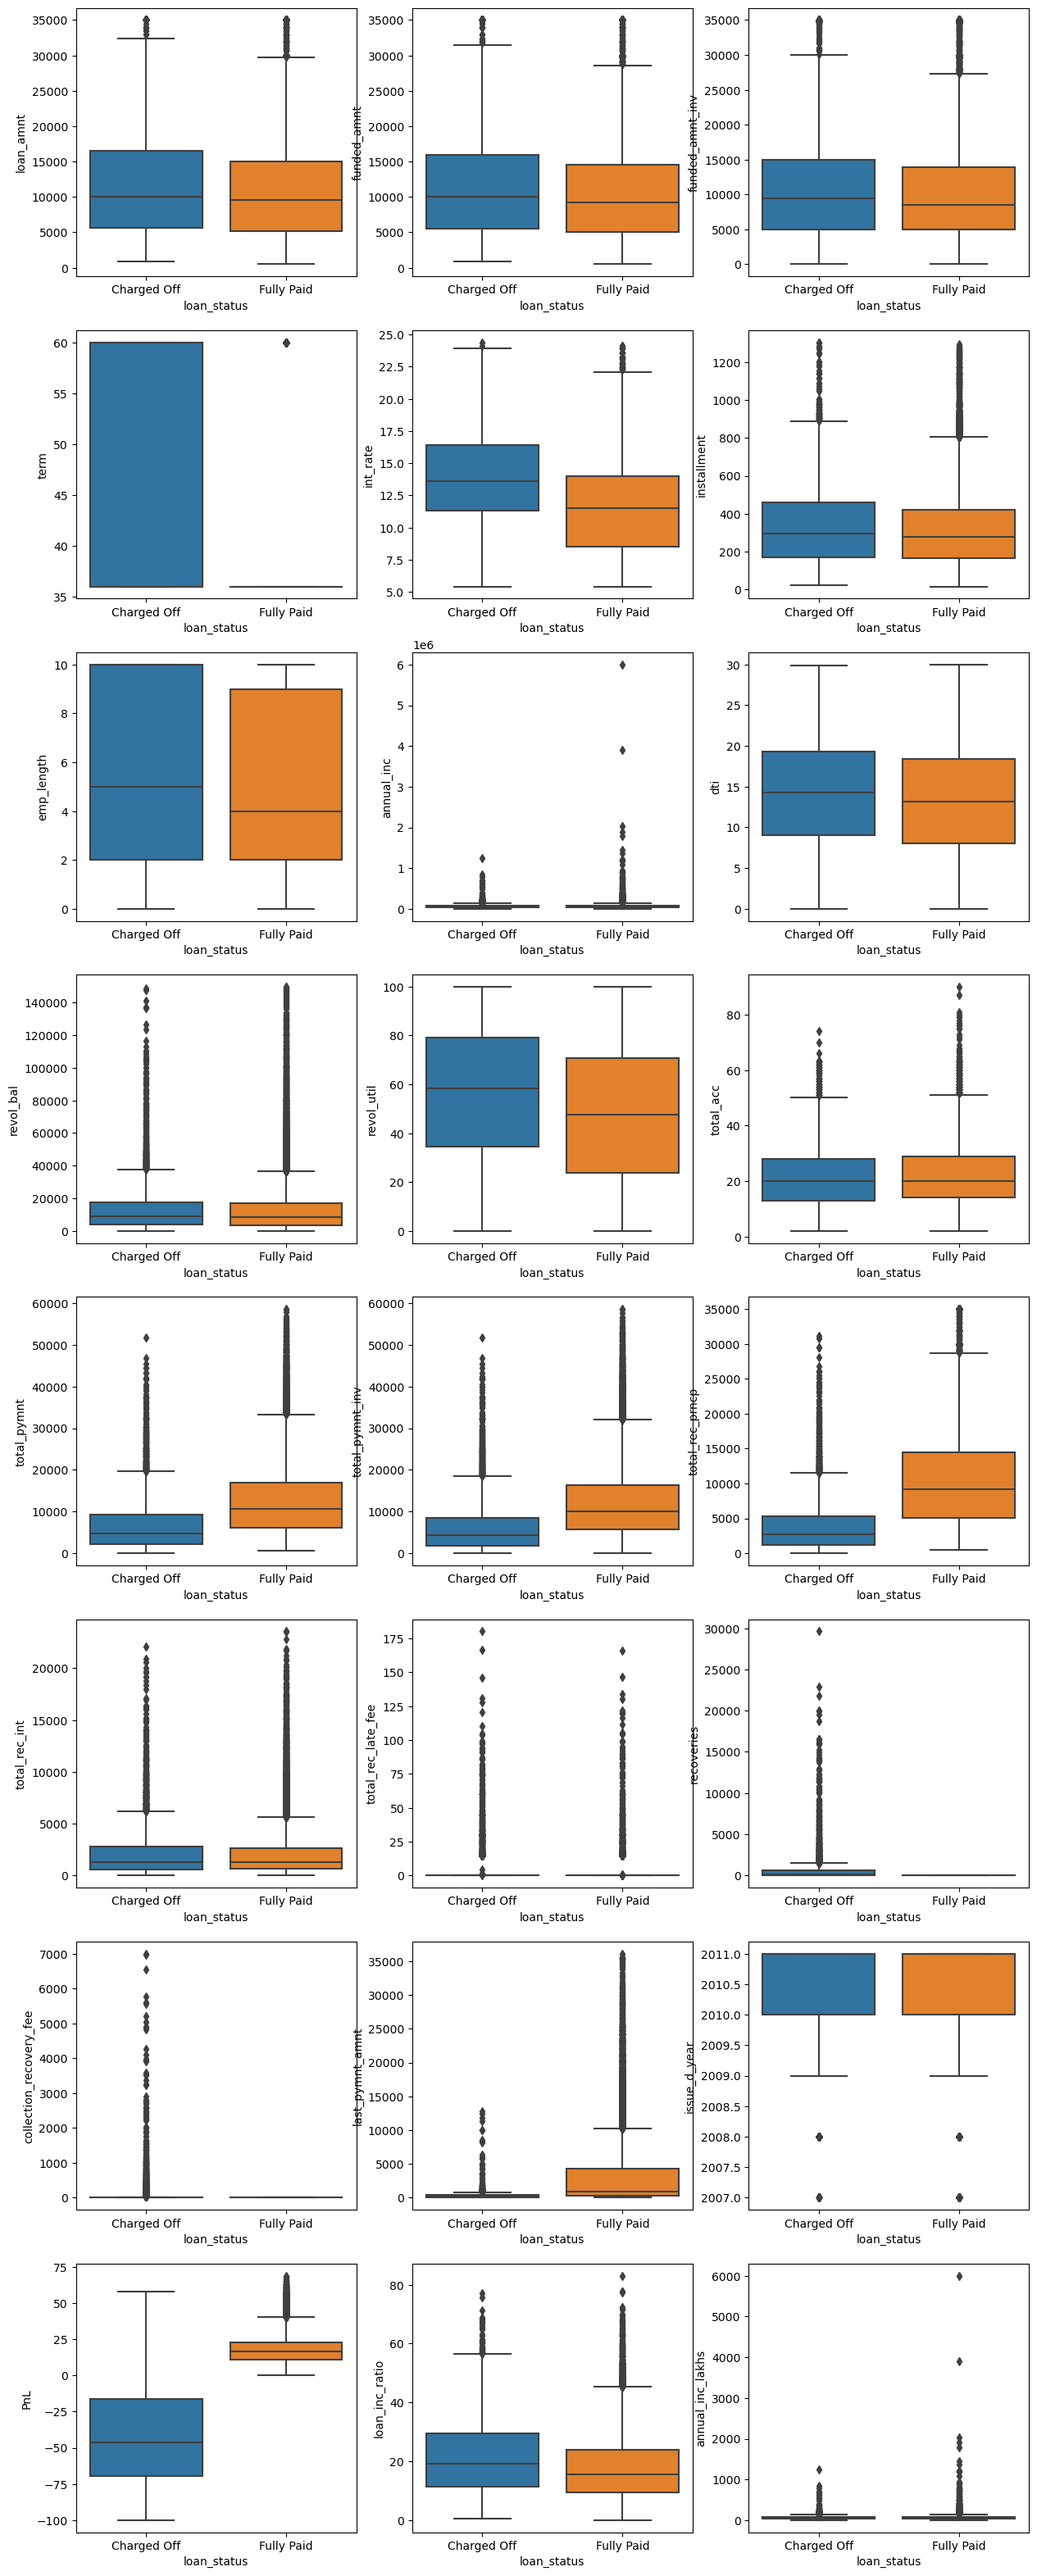

In [58]:
#Plotting all the 24 numerical columns vs loan_status to see the numerical data's impact on tendency to default

plt.figure(figsize=(15,40))


for i in range(len(numeric_columns.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_columns.columns[i], x='loan_status', data=df)

plt.show()

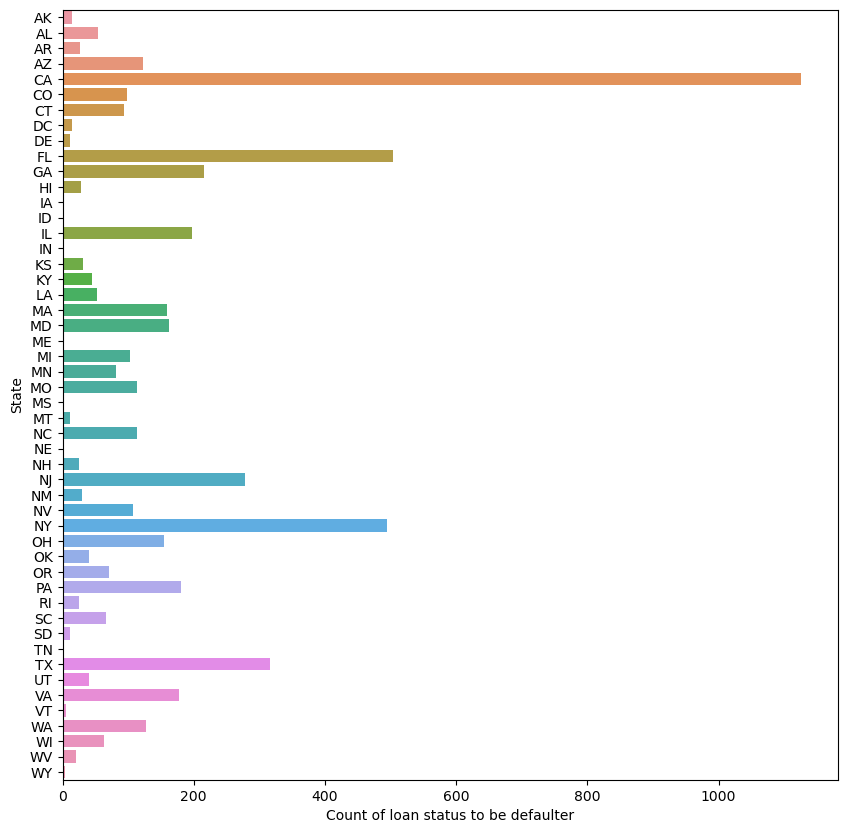

In [59]:
#Analyzing the state information to find the correlation between states resulting in a tendency to default

g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

##### Observations:Borrowers from CA - California have the highest tendency to default followed by Fl - Florida and NY - New York

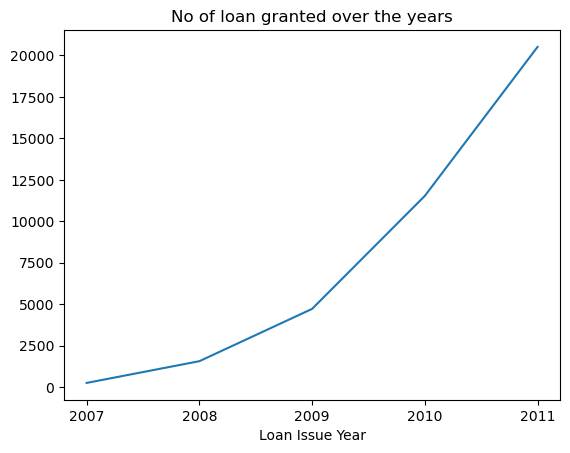

In [60]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

<AxesSubplot:xlabel='issue_d_year', ylabel='count'>

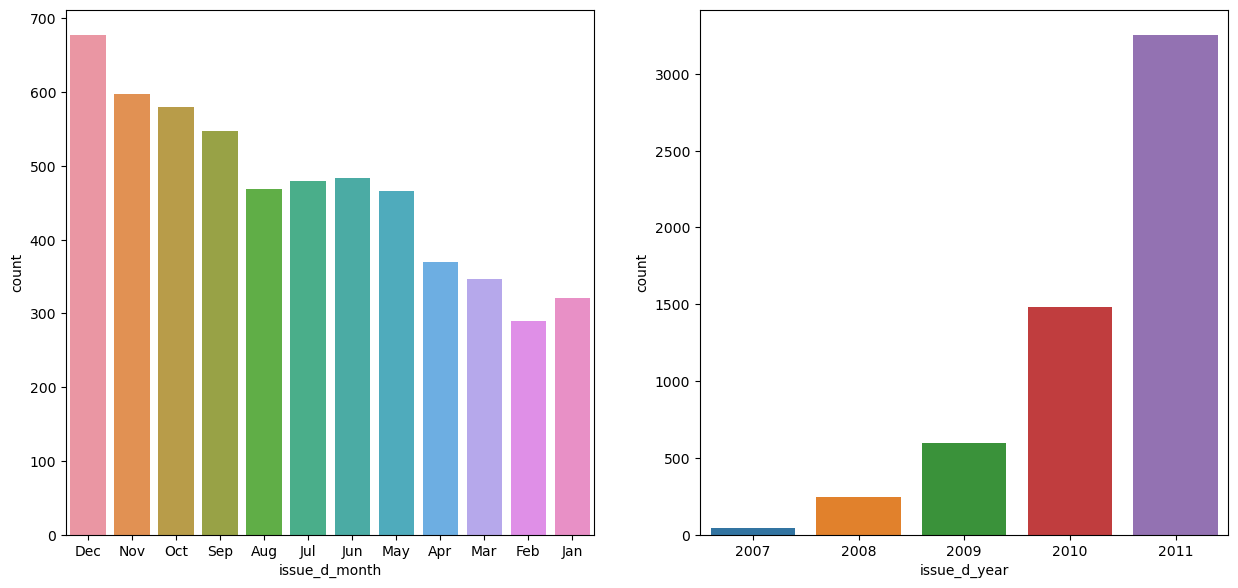

In [61]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=df[df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=df[df['loan_status']=='Charged Off'])

##### Observations: Maximum number of defaults occured when the loan was sanctioned/issued in Dec 2011. Number of Loans issued in the year 2011 were also more than double as compared to other years

##### Also there is a very interesting observation from the month in which the loan is issued. The late months of an year indicated the high possibility of defaulting.
The high number of loan requirements and defaults in 2011 is a strong indicator that it could be due to the financial crisis in USA particularly in three major states (CA, FL, Ny) (Assuming the data is of US origin)

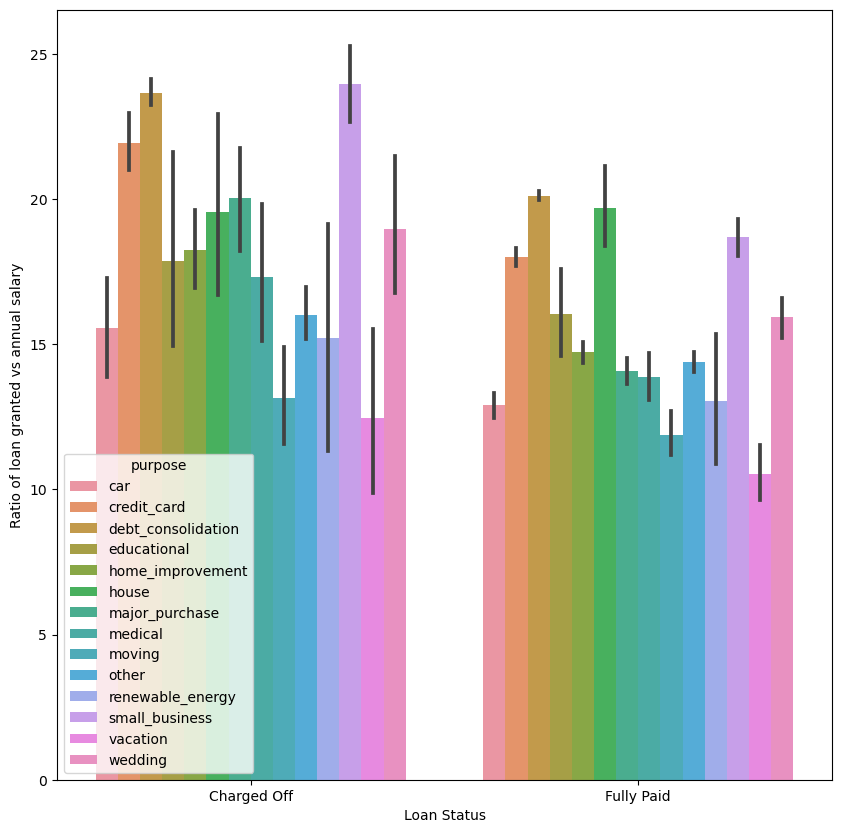

In [62]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

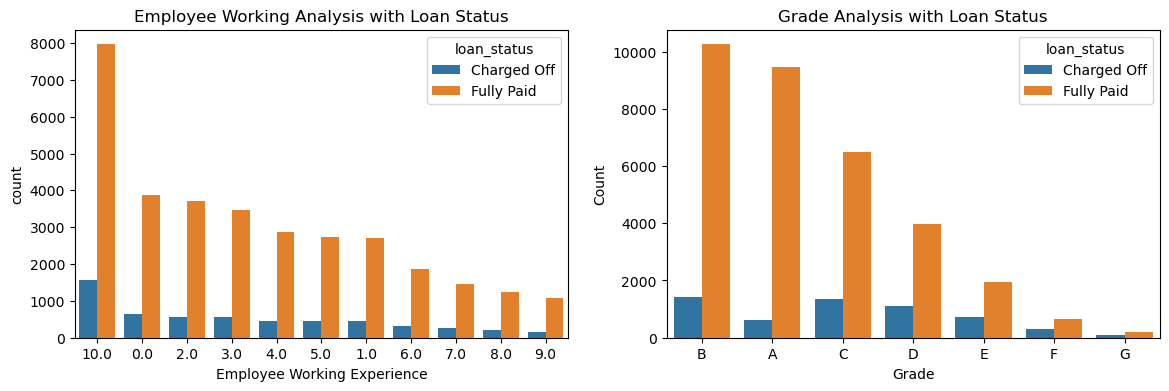

In [63]:
# emp_length Vs Loan Status Analysis

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='emp_length', data=df, order=df['emp_length'].value_counts().index, hue='loan_status')
plt.xlabel("Employee Working Experience")
plt.ylabel('count')
plt.title("Employee Working Analysis with Loan Status")

plt.subplot(1,2,2)


#Grades vs Loan Status analysis:
sns.countplot(x='grade', hue= 'loan_status',data=df, order=df['grade'].value_counts().index)
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Grade Analysis with Loan Status")

plt.show()

##### Most of the defaulters are those have tenure of 10/10+ years and belongs grade B C D

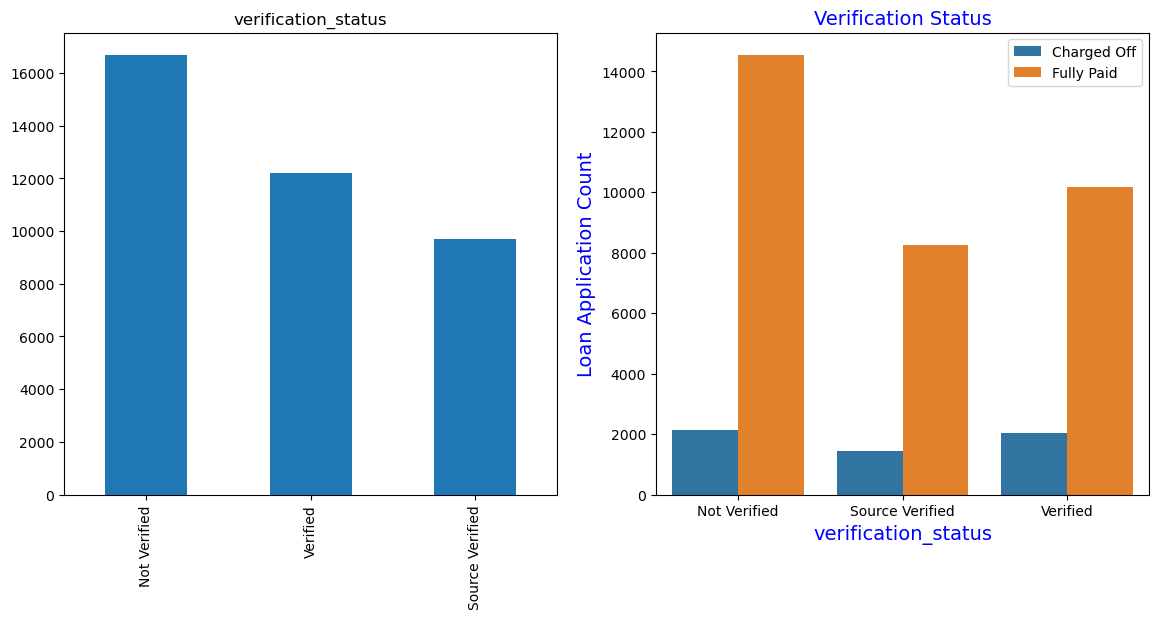

In [64]:
#Loan Verification Status
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)

df['verification_status'].value_counts().plot.bar(title= 'verification_status')

plt.subplot(1,2,2)

ax = sns.countplot(x= "verification_status",data= df,hue= 'loan_status')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Verification Status',fontsize=14,color='b')
ax.set_xlabel('verification_status',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

##### Observations: There is very small variance in defaulters being verified or not, so it doesn't add much to the analysis or classification